In [25]:
import pandas as pd
import requests
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [26]:
url = "https://api-football-v1.p.rapidapi.com/v3/fixtures"

querystring0 = {"league":"624","season":"2020"}
querystring1 = {"league":"624","season":"2021"}
querystring2 = {"league":"624","season":"2022"}
querystring3 = {"league":"624","season":"2023"}
querystring4 = {"league":"624","season":"2024"}


headers = {
	"x-rapidapi-key": "13258f1b4emshb43f7f6e56a6349p1008d4jsn0e4aa3829d36",
	"x-rapidapi-host": "api-football-v1.p.rapidapi.com"
}

response0 = requests.get(url, headers=headers, params=querystring0)
response1 = requests.get(url, headers=headers, params=querystring1)
response2 = requests.get(url, headers=headers, params=querystring2)
response3 = requests.get(url, headers=headers, params=querystring3)
response4 = requests.get(url, headers=headers, params=querystring4)

In [27]:
data0 = response0.json()
data1 = response1.json()
data2 = response2.json()
data3 = response3.json()
data4 = response4.json()

In [28]:
df_2020= pd.DataFrame(data0['response'])
df_2021= pd.DataFrame(data1['response'])
df_2022= pd.DataFrame(data2['response'])
df_2023= pd.DataFrame(data3['response'])
df_2024= pd.DataFrame(data4['response'])

### Data Cleaning and Data Structuring

* Combining 5 datas (with concat) 
* Using 'pd.json_normalize' to split all columns 
* Droping unnecessary columns 
* Renaming all columns 
* Formating date
* Handling NaNs 

###### For the entire data

In [29]:
df_combined = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)

In [30]:
df_combined

,fixture,league,teams,goals,score
0,"{'id': 488991, 'referee': 'Paulo Moreira', 'ti...","{'id': 624, 'name': 'Carioca - 1', 'country': ...","{'home': {'id': 7782, 'name': 'Nova Iguaçu', '...","{'home': 2, 'away': 0}","{'halftime': {'home': 0, 'away': 0}, 'fulltime..."
1,"{'id': 488993, 'referee': 'Alex Gomes', 'timez...","{'id': 624, 'name': 'Carioca - 1', 'country': ...","{'home': {'id': 7835, 'name': 'Portuguesa RJ',...","{'home': 2, 'away': 0}","{'halftime': {'home': 1, 'away': 0}, 'fulltime..."
2,"{'id': 488992, 'referee': 'Felipe da Silva Gon...","{'id': 624, 'name': 'Carioca - 1', 'country': ...","{'home': {'id': 13104, 'name': 'América RJ', '...","{'home': 3, 'away': 1}","{'halftime': {'home': 1, 'away': 0}, 'fulltime..."
3,"{'id': 488994, 'referee': 'Yuri Elino Ferreira...","{'id': 624, 'name': 'Carioca - 1', 'country': ...","{'home': {'id': 2203, 'name': 'Americano Campo...","{'home': 0, 'away': 0}","{'halftime': {'home': 0, 'away': 0}, 'fulltime..."
4,"{'id': 488995, 'referee': 'João Ennio Sobral',...","{'id': 624, 'name': 'Carioca - 1', 'country': ...","{'home': {'id': 7815, 'name': 'Macaé', 'logo':...","{'home': 2, 'away': 0}","{'halftime': {'home': 1, 'away': 0}, 'fulltime..."
...,...,...,...,...,...
444,"{'id': 1180901, 'referee': 'Felipe da Silva Go...","{'id': 624, 'name': 'Carioca - 1', 'country': ...","{'home': {'id': 120, 'name': 'Botafogo', 'logo...","{'home': 2, 'away': 1}","{'halftime': {'home': 0, 'away': 1}, 'fulltime..."
445,"{'id': 1186267, 'referee': 'Alexandre Vargas T...","{'id': 624, 'name': 'Carioca - 1', 'country': ...","{'home': {'id': 2206, 'name': 'Boavista SC', '...","{'home': 0, 'away': 4}","{'halftime': {'home': 0, 'away': 1}, 'fulltime..."
446,"{'id': 1186265, 'referee': 'Alex Gomes', 'time...","{'id': 624, 'name': 'Carioca - 1', 'country': ...","{'home': {'id': 7782, 'name': 'Nova Iguaçu', '...","{'home': 0, 'away': 3}","{'halftime': {'home': 0, 'away': 1}, 'fulltime..."
447,"{'id': 1186268, 'referee': 'Yuri Elino Ferreir...","{'id': 624, 'name': 'Carioca - 1', 'country': ...","{'home': {'id': 120, 'name': 'Botafogo', 'logo...","{'home': 2, 'away': 0}","{'halftime': {'home': 0, 'away': 0}, 'fulltime..."


In [31]:
df_flat = pd.json_normalize(df_combined.to_dict(orient="records"))

In [32]:
df_flat

,fixture.id,fixture.referee,fixture.timezone,fixture.date,fixture.timestamp,fixture.periods.first,fixture.periods.second,fixture.venue.id,fixture.venue.name,fixture.venue.city,...,goals.home,goals.away,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,score.extratime.home,score.extratime.away,score.penalty.home,score.penalty.away
0,488991,Paulo Moreira,UTC,2019-12-22T18:00:00+00:00,1577037600,1577037600,1577041200,5635.0,Estádio Jânio de Moraes,"Nova Iguaçu, Rio de Janeiro",...,2,0,0,0,2,0,NaN,NaN,NaN,NaN
1,488993,Alex Gomes,UTC,2019-12-22T18:00:00+00:00,1577037600,1577037600,1577041200,5665.0,Estádio Luso-Brasileiro,"Rio de Janeiro, Rio de Janeiro",...,2,0,1,0,2,0,NaN,NaN,NaN,NaN
2,488992,Felipe da Silva Gonçalves,UTC,2019-12-22T18:00:00+00:00,1577037600,1577037600,1577041200,8281.0,Estádio Giulite Coutinho,"Mesquita, Rio de Janeiro",...,3,1,1,0,3,1,NaN,NaN,NaN,NaN
3,488994,Yuri Elino Ferreira da Cruz,UTC,2019-12-28T18:00:00+00:00,1577556000,1577556000,1577559600,208.0,Estádio Antônio Ferreira de Medeiros,"Cardoso Moreira, Rio de Janeiro",...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,488995,João Ennio Sobral,UTC,2019-12-29T18:00:00+00:00,1577642400,1577642400,1577646000,5651.0,Estádio Claúdio Moacir de Azevedo,"Macaé, Rio de Janeiro",...,2,0,1,0,2,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,1180901,Felipe da Silva Gonçalves,UTC,2024-03-17T21:30:00+00:00,1710711000,1710711000,1710714600,218.0,Estádio Nilton Santos,Rio de Janeiro,...,2,1,0,1,2,1,NaN,NaN,NaN,NaN
445,1186267,Alexandre Vargas Tavares de Jesus,UTC,2024-03-26T22:30:00+00:00,1711492200,1711492200,1711495800,217.0,Estádio Elcyr Resende de Mendonça,"Saquarema, Rio de Janeiro",...,0,4,0,1,0,4,NaN,NaN,NaN,NaN
446,1186265,Alex Gomes,UTC,2024-03-30T20:00:00+00:00,1711828800,1711828800,1711832400,NaN,Estadio Jornalista Mário Filho,"Rio de Janeiro, Rio de Janeiro",...,0,3,0,1,0,3,NaN,NaN,NaN,NaN
447,1186268,Yuri Elino Ferreira da Cruz,UTC,2024-03-31T21:30:00+00:00,1711920600,1711920600,1711924200,218.0,Estádio Nilton Santos,Rio de Janeiro,...,2,0,0,0,2,0,NaN,NaN,NaN,NaN


In [33]:
df1 = df_flat.drop(['fixture.id','fixture.timezone', 'fixture.timestamp','fixture.periods.first','fixture.periods.second','fixture.status.long','fixture.status.short','fixture.status.elapsed','fixture.status.extra','league.id','league.name','league.country','league.logo', 'league.flag','teams.home.id','teams.home.logo','teams.away.id','fixture.venue.id','teams.away.logo','score.extratime.home', 'score.extratime.away', 'score.penalty.home','score.penalty.away'], axis=1)

In [34]:
df1.rename(columns={
    'fixture.referee': 'referee',
    'fixture.date': 'date',
    'fixture.venue.name': 'stadium',
    'fixture.venue.city': 'city',
    'league.season': 'season',
    'league.round': 'round',
    'teams.home.name': 'home_team_name',
    'teams.home.winner': 'home_team_winner',
    'teams.away.name': 'away_team_name',
    'teams.away.winner': 'away_team_winner',
    'goals.home': 'home_team_goals',
    'goals.away': 'away_team_goals',
    'score.halftime.home': 'halftime_home_score',
    'score.halftime.away': 'halftime_away_score',
    'score.fulltime.home': 'fulltime_home_score',
    'score.fulltime.away': 'fulltime_away_score'
}, inplace=True)

In [35]:
df2 = df1.copy()

In [36]:
df2['date'] = pd.to_datetime(df1['date']).dt.strftime('%d/%m/%Y')

In [37]:
df2.loc[102, 'stadium'] = 'Estádio Nilton Santos'
df2.loc[102, 'city'] = 'Rio de Janeiro, Rio de Janeiro'
df2.loc[103, 'stadium'] = 'Estadio Jornalista Mário Filho'
df2.loc[103, 'city'] = 'Rio de Janeiro, Rio de Janeiro'
df2.loc[105, 'stadium'] = 'Estadio Jornalista Mário Filho'
df2.loc[105, 'city'] = 'Rio de Janeiro, Rio de Janeiro'

In [38]:
def map_winner_columns(df2):

    df2['home_team_winner'] = df2['home_team_winner'].fillna('D')
    df2['away_team_winner'] = df2['away_team_winner'].fillna('D')

    df2['home_team_winner'] = df2['home_team_winner'].map({True: 'W', False: 'L','D':'D'})
    df2['away_team_winner'] = df2['away_team_winner'].map({True: 'W', False: 'L','D':'D'})

    return df2

df3 = map_winner_columns(df2)

### Creating functions by season

In [114]:
df_2021 = df3[df3['season'] == 2021]
df_2022 = df3[df3['season'] == 2022]
df_2023 = df3[df3['season'] == 2023]
df_2024 = df3[df3['season'] == 2024]

In [115]:
df_2021 = df3[df3['season'] == 2021]
df3['date'] = pd.to_datetime(df3['date'], format='%d/%m/%Y')
filtered_df = df_2021[df_2021['date'] >= '2021-03-03']
df_2021 = filtered_df
df_2021['round'].value_counts()
championship_rounds = [
    'Championship - 1', 'Championship - 2', 'Championship - 3', 'Championship - 4', 
    'Championship - 5', 'Championship - 6', 'Championship - 7', 'Championship - 8', 
    'Championship - 9', 'Championship - 10', 'Championship - 11'
]
df_2021 = df_2021[df_2021['round'].isin(championship_rounds)]


In [116]:
df_2022 = df3[df3['season'] == 2022]
df3['date'] = pd.to_datetime(df3['date'], format='%d/%m/%Y')
filtered_df = df_2022[df_2022['date'] >= '2022-01-25']
df_2022 = filtered_df
df_2022['round'].value_counts()
championship_rounds = [
    'Championship - 1', 'Championship - 2', 'Championship - 3', 'Championship - 4', 
    'Championship - 5', 'Championship - 6', 'Championship - 7', 'Championship - 8', 
    'Championship - 9', 'Championship - 10', 'Championship - 11'
]

df_2022 = df_2022[df_2022['round'].isin(championship_rounds)]

In [117]:
df_2023 = df3[df3['season'] == 2023]
df3['date'] = pd.to_datetime(df3['date'], format='%d/%m/%Y')
filtered_df = df_2023[df_2023['date'] >= '2023-01-12']
df_2023 = filtered_df
df_2023['round'].value_counts()
championship_rounds = [
    'Championship - 1', 'Championship - 2', 'Championship - 3', 'Championship - 4', 
    'Championship - 5', 'Championship - 6', 'Championship - 7', 'Championship - 8', 
    'Championship - 9', 'Championship - 10', 'Championship - 11'
]

df_2023 = df_2023[df_2023['round'].isin(championship_rounds)]

In [118]:
df_2024 = df3[df3['season'] == 2024]
df3['date'] = pd.to_datetime(df3['date'], format='%d/%m/%Y')
filtered_df = df_2024[df_2024['date'] >= '2023-01-12']
df_2024 = filtered_df
df_2024['round'].value_counts()
championship_rounds = [
    'Championship - 1', 'Championship - 2', 'Championship - 3', 'Championship - 4', 
    'Championship - 5', 'Championship - 6', 'Championship - 7', 'Championship - 8', 
    'Championship - 9', 'Championship - 10', 'Championship - 11'
]

df_2024 = df_2024[df_2024['round'].isin(championship_rounds)]

In [127]:
import pandas as pd

def get_unique_teams(df):
    return pd.concat([df['home_team_name'], df['away_team_name']]).unique()

def calculate_team_goals(df, team_name):
    home_goals = df[df['home_team_name'] == team_name]['home_team_goals'].sum()
    away_goals = df[df['away_team_name'] == team_name]['away_team_goals'].sum()
    return home_goals, away_goals

def calculate_goals_for_all_teams(df):
    teams = get_unique_teams(df)
    goals_summary = [{'team': team, 'home_goals': calculate_team_goals(df, team)[0], 'away_goals': calculate_team_goals(df, team)[1]} for team in teams]
    return pd.DataFrame(goals_summary)

def calculate_matches_per_team(df):
    teams = get_unique_teams(df)
    matches_summary = [{'team': team, 
                        'home_matches': df[df['home_team_name'] == team].shape[0], 
                        'away_matches': df[df['away_team_name'] == team].shape[0],
                        'total_matches': df[df['home_team_name'] == team].shape[0] + df[df['away_team_name'] == team].shape[0]} 
                       for team in teams]
    return pd.DataFrame(matches_summary)

def merge_summary_data(matches_df, goals_df):
    return pd.merge(matches_df, goals_df, on='team')

def extract_winner_columns(df):
    return df[['home_team_name', 'home_team_winner']], df[['away_team_name', 'away_team_winner']]

def group_and_count_winners(df_home, df_away):
    df_home_grouped = df_home.groupby('home_team_name')['home_team_winner'].value_counts().unstack(fill_value=0)
    df_away_grouped = df_away.groupby('away_team_name')['away_team_winner'].value_counts().unstack(fill_value=0)
    return df_home_grouped, df_away_grouped

def combine_home_away_scores(df_home_grouped, df_away_grouped):
    return pd.merge(df_home_grouped, df_away_grouped, left_index=True, right_index=True, suffixes=('_home', '_away'))

def calculate_total_results(df):
    df['W'] = df['W_home'] + df['W_away']
    df['L'] = df['L_home'] + df['L_away']
    df['D'] = df['D_home'] + df['D_away']
    return df[['W', 'L', 'D']]

def rename_team_column(df):
    return df.rename(columns={'team': 'home_team_name'})

def merge_and_sort_dataframes(df_scores, summary_df):
    df_merged = pd.merge(df_scores, summary_df, on='home_team_name')
    return df_merged.sort_values(by='W', ascending=False)

def calculate_and_sort_by_points(df):
    
    df['total_points'] = df['W'] * 3 + df['D'] * 1
    df['performance'] = round((df['total_points'] / (df['total_matches'] * 3)) * 100, 2)
    
    df_sorted = df.sort_values(by='total_points', ascending=False)
    
    return df_sorted

def rename_back_to_team_name(df):
    return df.rename(columns={'home_team_name': 'team_name'})

def add_total_goals_and_reorder_columns(df):
    
    df['total_goals'] = df['home_goals'] + df['away_goals']
    columns_order = ['team_name', 'W', 'L', 'D', 'total_matches', 'home_goals', 'away_goals', 'total_goals', 'total_points', 'performance']
    
    df = df[columns_order]
    
    return df

def add_positions_and_fix_index(df):
  
    df = df.reset_index(drop=True)
    df['position'] = df.index + 1
    
    columns_order = ['position', 'team_name', 'W', 'L', 'D', 'total_matches', 'home_goals', 'away_goals', 'total_goals', 'total_points', 'performance']
    df = df[columns_order]
    
    return df

def generate_team_summary(df):
    goals_summary_df = calculate_goals_for_all_teams(df)
    matches_summary_df = calculate_matches_per_team(df)
    summary_df = merge_summary_data(matches_summary_df, goals_summary_df)
    df_home_winner, df_away_winner = extract_winner_columns(df)
    df_home_grouped, df_away_grouped = group_and_count_winners(df_home_winner, df_away_winner)
    df_score_combined = combine_home_away_scores(df_home_grouped, df_away_grouped)
    df_score_combined = calculate_total_results(df_score_combined)
    summary_df = rename_team_column(summary_df)
    df_merged = merge_and_sort_dataframes(df_score_combined, summary_df)
    df_final = calculate_and_sort_by_points(df_merged)
    df_final = rename_back_to_team_name(df_final)
    df_final = add_total_goals_and_reorder_columns(df_final)
    df_final = add_positions_and_fix_index(df_final)
    return df_final


In [128]:
df_21 = generate_team_summary(df_2021)
df_22 = generate_team_summary(df_2022)
df_23 = generate_team_summary(df_2023)
df_24 = generate_team_summary(df_2024)

In [149]:
df_24

,position,team_name,W,L,D,total_matches,home_goals,away_goals,total_goals,total_points,performance
0,1,Flamengo,8,0,3,11,17,6,23,27,81.82
1,2,Nova Iguaçu,7,1,3,11,7,11,18,24,72.73
2,3,Vasco DA Gama,6,1,4,11,11,9,20,22,66.67
3,4,Fluminense,6,2,3,11,12,5,17,21,63.64
4,5,Botafogo,6,3,2,11,10,9,19,20,60.61
5,6,Boavista SC,5,3,3,11,13,5,18,18,54.55
6,7,Portuguesa RJ,3,3,5,11,4,5,9,14,42.42
7,8,Madureira,3,7,1,11,7,2,9,10,30.30
8,9,Sampaio Corrêa RJ,3,7,1,11,7,7,14,10,30.30
9,10,Volta Redonda,2,6,3,11,7,5,12,9,27.27


In [163]:
df_21['season'] = df_21['season'] = 2021
df_22['season'] = df_22['season']= 2022
df_23['season'] = df_23['season']= 2023
df_24['season'] = df_24['season']= 2024

Text(0, 0.5, 'Percentage of Performance (%)')

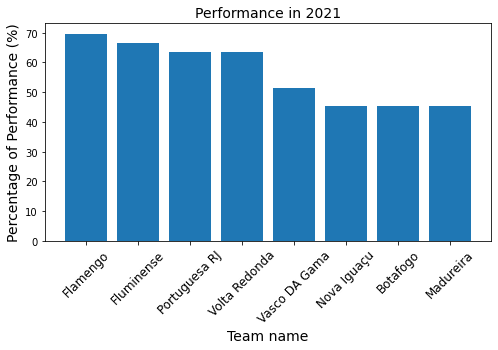

In [174]:
df_21['performance'] = round((df_21['total_points'] / (df_21['total_matches'] * 3)) * 100, 2)
average_performance = df_21['performance'].mean()
teams_above_average = df_21[df_21['performance'] > average_performance]

plt.figure(figsize=(8, 4))
plt.bar(teams_above_average['team_name'], teams_above_average['performance'])

plt.title('Performance in 2021',fontsize=14)

plt.xlabel('Team name', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.ylabel('Percentage of Performance (%)', fontsize=14)

Text(0, 0.5, 'Percentage of Performance (%)')

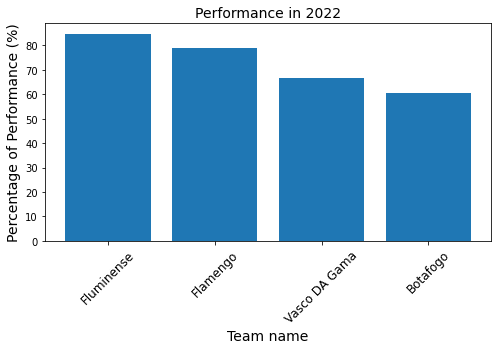

In [188]:
df_22['performance'] = round((df_22['total_points'] / (df_22['total_matches'] * 3)) * 100, 2)
average_performance = df_22['performance'].mean()
teams_above_average = df_22[df_22['performance'] > average_performance]

plt.figure(figsize=(8, 4))
plt.bar(teams_above_average['team_name'], teams_above_average['performance'])

plt.title('Performance in 2022',fontsize=14)

plt.xlabel('Team name', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.ylabel('Percentage of Performance (%)', fontsize=14)

Text(0, 0.5, 'Percentage of Performance (%)')

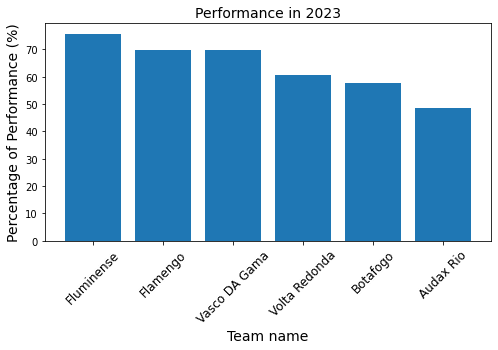

In [176]:
df_23['performance'] = round((df_23['total_points'] / (df_23['total_matches'] * 3)) * 100, 2)
average_performance = df_23['performance'].mean()
teams_above_average = df_23[df_23['performance'] > average_performance]

plt.figure(figsize=(8, 4))
plt.bar(teams_above_average['team_name'], teams_above_average['performance'])

plt.title('Performance in 2023',fontsize=14)

plt.xlabel('Team name', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.ylabel('Percentage of Performance (%)', fontsize=14)

Text(0, 0.5, 'Percentage of Performance (%)')

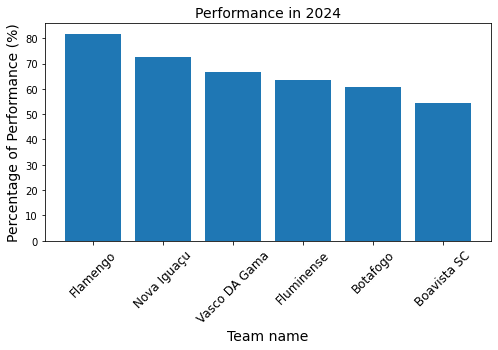

In [177]:
df_24['performance'] = round((df_24['total_points'] / (df_24['total_matches'] * 3)) * 100, 2)
average_performance = df_24['performance'].mean()
teams_above_average = df_24[df_24['performance'] > average_performance]

plt.figure(figsize=(8, 4))
plt.bar(teams_above_average['team_name'], teams_above_average['performance'])

plt.title('Performance in 2024',fontsize=14)

plt.xlabel('Team name', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.ylabel('Percentage of Performance (%)', fontsize=14)

In [168]:
df_21_positions= df_21[['position', 'team_name', 'season']]
df_22_positions= df_22[['position', 'team_name', 'season']]
df_23_positions= df_23[['position', 'team_name', 'season']]
df_24_positions= df_24[['position', 'team_name', 'season']]

In [169]:
df_all_positions = pd.concat([df_21_positions, df_22_positions, df_23_positions, df_24_positions])

In [170]:
df_pivot = df_all_positions.pivot_table(index='team_name', columns='season', values='position')

In [171]:
df_sorted = df_pivot.sort_values(by=2021, ascending=True)

In [172]:
df_sorted = df_sorted.fillna(0).astype(int).replace(0, '-')

In [189]:
df_all_positions = pd.concat([df_21_positions, df_22_positions, df_23_positions, df_24_positions])
df_pivot = df_all_positions.pivot_table(index='team_name', columns='season', values='position')
df_sorted = df_pivot.sort_values(by=2021, ascending=True)
df_sorted = df_sorted.fillna(0).astype(int).replace(0, '-')
df_sorted

season,2021,2022,2023,2024
team_name,,,,
Flamengo,1,2,2,1
Fluminense,2,1,1,4
Portuguesa RJ,3,7,8,7
Volta Redonda,4,12,4,10
Vasco DA Gama,5,3,3,3
Nova Iguaçu,6,5,7,2
Botafogo,7,4,5,5
Madureira,8,10,10,8
Resende,9,8,12,-


In [190]:
df_sorted

season,2021,2022,2023,2024
team_name,,,,
Flamengo,1,2,2,1
Fluminense,2,1,1,4
Portuguesa RJ,3,7,8,7
Volta Redonda,4,12,4,10
Vasco DA Gama,5,3,3,3
Nova Iguaçu,6,5,7,2
Botafogo,7,4,5,5
Madureira,8,10,10,8
Resende,9,8,12,-


In [161]:
df_sorted.columns

Int64Index([2021, 2022, 2023, 2024], dtype='int64', name='season')

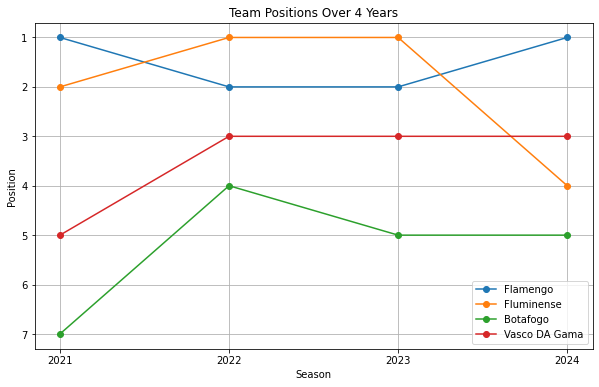

In [181]:
df_sorted = df_sorted.apply(pd.to_numeric, errors='coerce')

teams_to_plot = ['Flamengo', 'Fluminense', 'Botafogo', 'Vasco DA Gama']
df_selected = df_sorted.loc[teams_to_plot]

plt.figure(figsize=(10, 6))

for team in teams_to_plot:
    plt.plot(df_selected.columns, df_selected.loc[team], marker='o', label=team)

plt.title('Team Positions Over 4 Years')
plt.xlabel('Season')
plt.ylabel('Position')
plt.gca().invert_yaxis() 
plt.xticks(df_selected.columns)
plt.legend()
plt.grid(True)
plt.show()